# Case Study - Leads Scoring

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


### Reading and understanding Dataset

In [2]:
# reading
leads_scoring_df = pd.read_csv("C:\\Users\\rinsh\\Downloads\\Lead+Scoring+Case+Study\\Lead Scoring Assignment\\Leads.csv")
leads_scoring_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# info()
leads_scoring_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
# decribe
leads_scoring_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# shape
leads_scoring_df.shape

(9240, 37)

### Data cleaning

In [6]:
# few columns showing 'Select'. These values are as good as missing values and hence it will convert 'Select' values to Nan
# Replacing 'Select' values with Nan
leads_scoring_df=leads_scoring_df.replace("Select", np.nan)

In [7]:
# checking for missing values
leads_scoring_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
# checking missing value percentages
round(100*(leads_scoring_df.isnull().sum()/len(leads_scoring_df)),2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Dropping

In [9]:
# dropping columns having missing value percentages greater than or equal to 35%
columns_missing=leads_scoring_df.columns

for i in columns_missing:
    if((100*(leads_scoring_df[i].isnull().sum()/len(leads_scoring_df.index))) >=35):
        leads_scoring_df.drop(i, axis=1,inplace = True)

In [10]:
# rechecking the missing value percentage after dropping
round(100*(leads_scoring_df.isnull().sum()/len(leads_scoring_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

#### Imputing

In [11]:
# Next considering the more than 20% of missing value columns:"Country"(26.63),"What is your current occupation"( 29.11),"What matters most to you in choosing a course"(29.32)
#country column with 26.63% missing value
# checking the total count of country column with missing values
leads_scoring_df.Country.isnull().sum()


2461

In [12]:
# checking valuecounts
leads_scoring_df.Country.value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [13]:
# There is one unknown category so the missing values filling with "unknown"
leads_scoring_df['Country'].fillna(value="unknown", inplace=True)

In [14]:
# Again checking  the missing values of country column
leads_scoring_df.Country.isnull().sum()

0

In [15]:
# "Whatis your current occupation"( 29.11)
# checking the total count of missing values
leads_scoring_df["What is your current occupation"].isnull().sum()


2690

In [16]:
# value counts
leads_scoring_df["What is your current occupation"].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [17]:
# most common value is "unemployed"
#filling missing value with this most common value using mode()
leads_scoring_df['What is your current occupation']=leads_scoring_df['What is your current occupation'].fillna(leads_scoring_df['What is your current occupation'].mode()[0])


In [18]:
#Again checking  the missing values of "What is your current occupation" column
leads_scoring_df["What is your current occupation"].isnull().sum()

0

In [19]:
#"What matters most to you in choosing a course"(29.32)
# checking the total count of missing values
leads_scoring_df["What matters most to you in choosing a course"].isnull().sum()

2709

In [20]:
# valuecounts
leads_scoring_df["What matters most to you in choosing a course"].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [21]:
# most common value is "Better Career Prospects"
# imputing the missing value with the most common value using mode()
leads_scoring_df['What matters most to you in choosing a course']=leads_scoring_df['What matters most to you in choosing a course'].fillna(leads_scoring_df['What matters most to you in choosing a course'].mode()[0])

In [22]:
#Again checking  the missing values of "What matters most to you in choosing a course" column
leads_scoring_df["What matters most to you in choosing a course"].isnull().sum()

0

In [23]:
# rechecking the missing value percentage after imputing with most common value using mode()
round(100*(leads_scoring_df.isnull().sum()/len(leads_scoring_df.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [24]:
# Now we have a dataset with almost less missing values.

### Exploratory Data Analysis

#### Univariate Analysis

##### Categorical Variables

In [25]:
# finding categorical varibles from datatype=object
leads_scoring_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

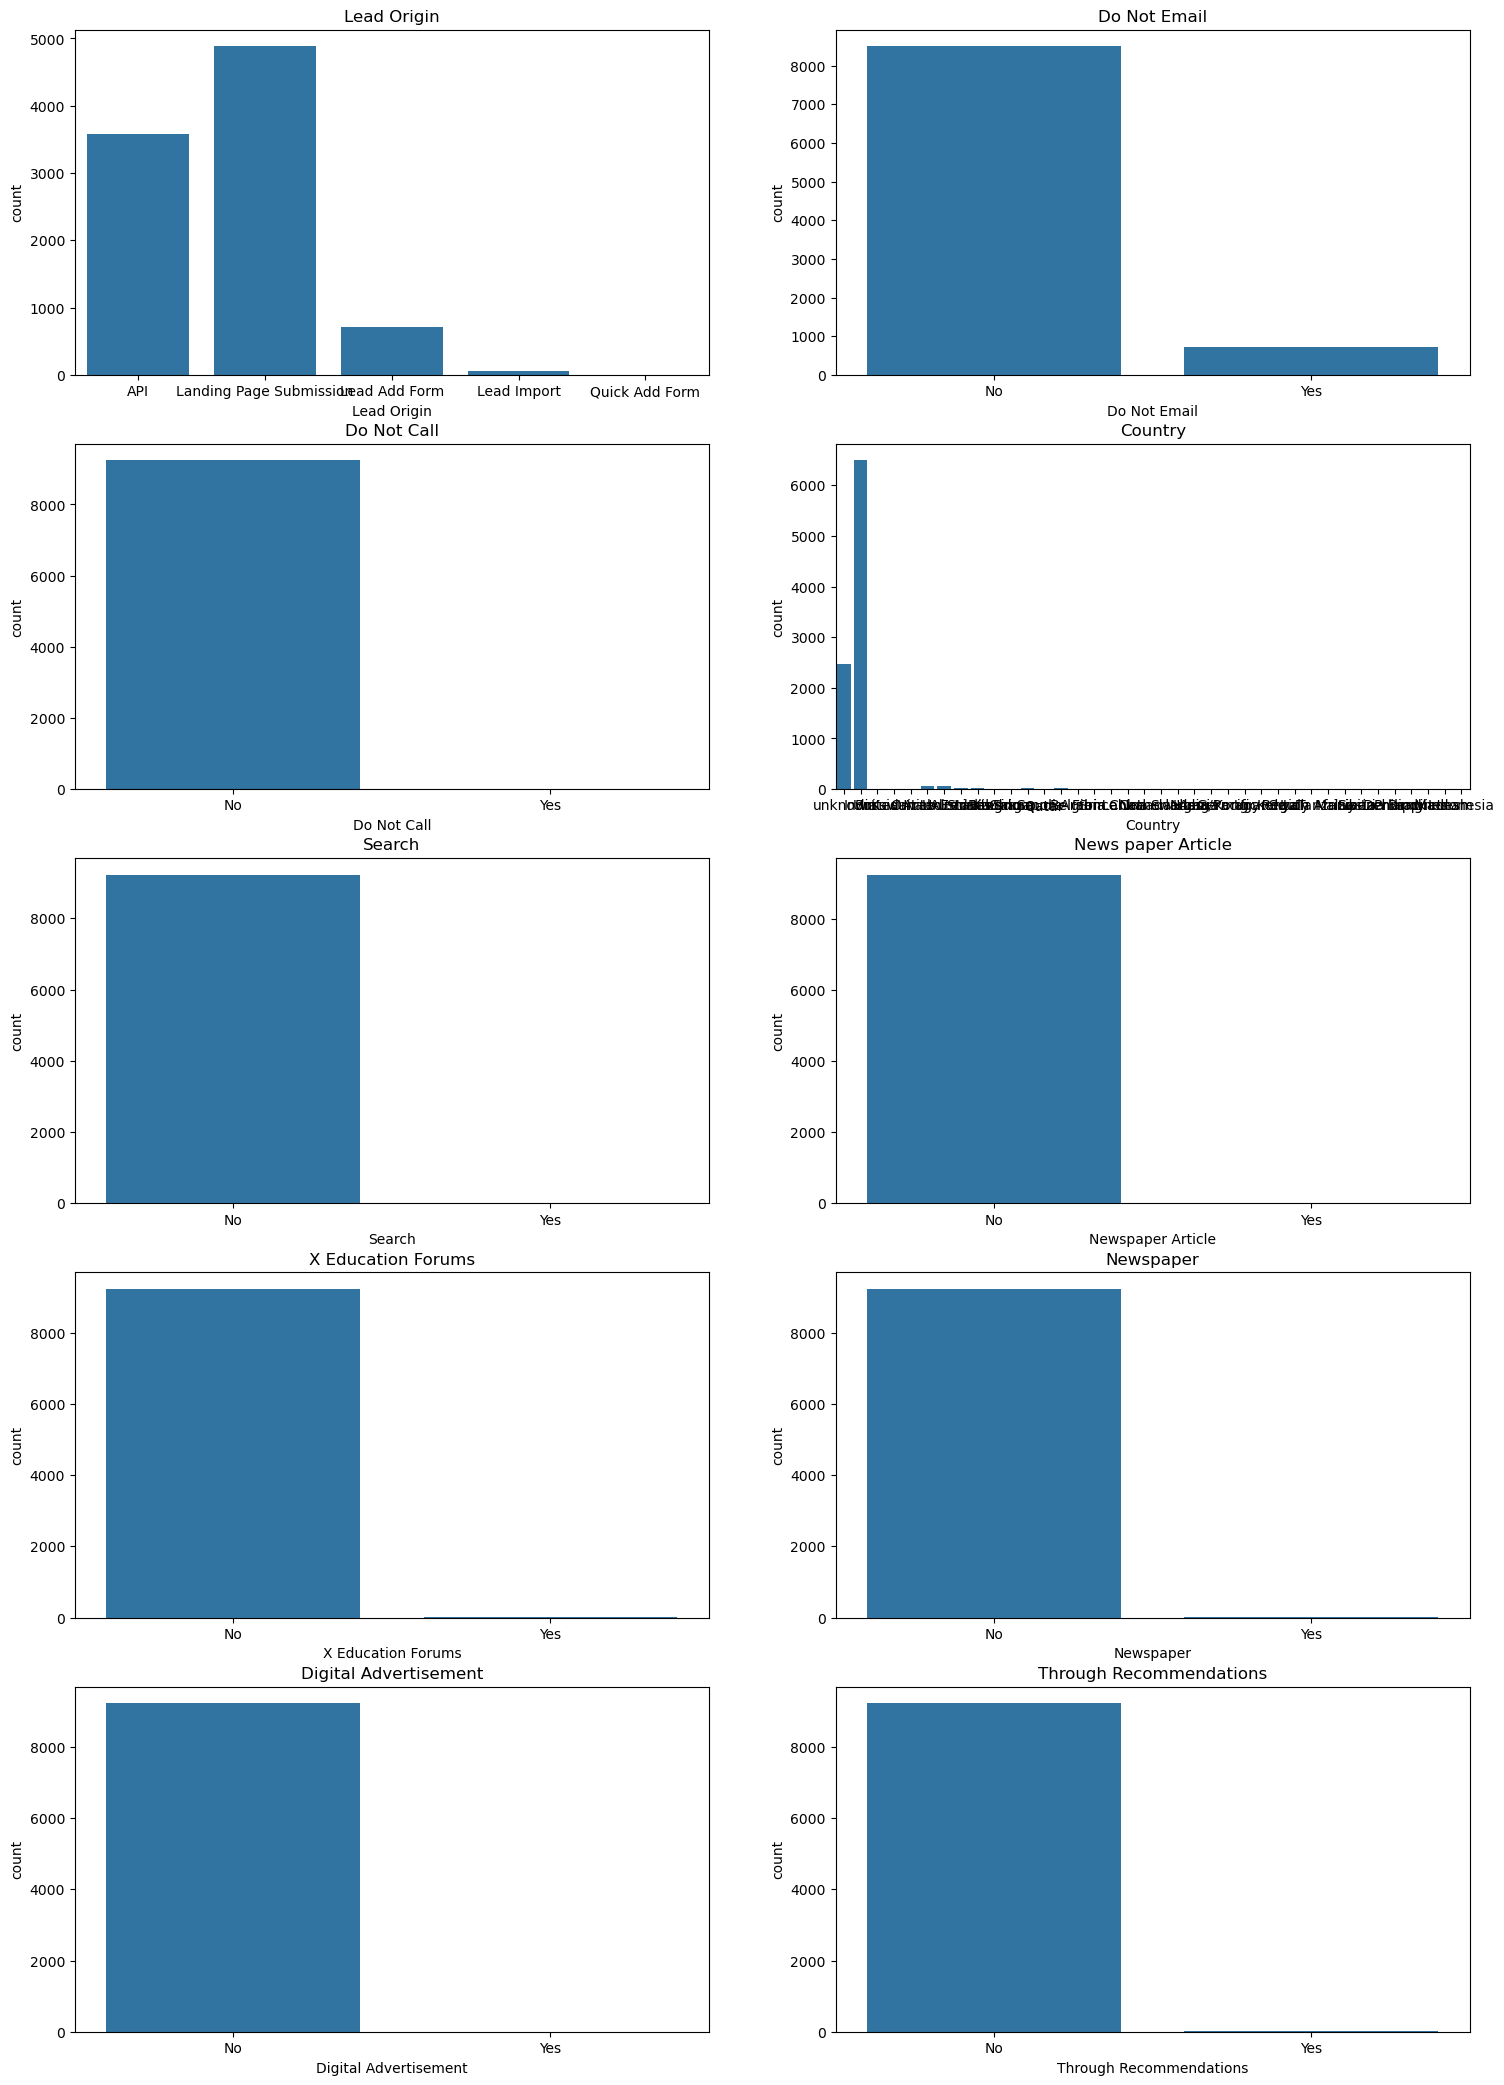

In [49]:
# visualising categorical variables using count plot 
plt.figure(figsize = (18,26))

plt.subplot(5,2,1)
sns.countplot(x='Lead Origin',data=leads_scoring_df)
plt.title('Lead Origin')

plt.subplot(5,2,2)
sns.countplot(x='Do Not Email',data=leads_scoring_df)
plt.title('Do Not Email')

plt.subplot(5,2,3)
sns.countplot(x='Do Not Call',data=leads_scoring_df)
plt.title('Do Not Call')

plt.subplot(5,2,4)
sns.countplot(x='Country',data=leads_scoring_df)
plt.title('Country')

plt.subplot(5,2,5)
sns.countplot(x='Search',data=leads_scoring_df)
plt.title('Search')

plt.subplot(5,2,6)
sns.countplot(x='Newspaper Article',data=leads_scoring_df)
plt.title('News paper Article')

plt.subplot(5,2,7)
sns.countplot(x='X Education Forums',data=leads_scoring_df)
plt.title('X Education Forums')

plt.subplot(5,2,8)
sns.countplot(x='Newspaper',data=leads_scoring_df)
plt.title('Newspaper')

plt.subplot(5,2,9)
sns.countplot(x='Digital Advertisement',data=leads_scoring_df)
plt.title('Digital Advertisement')

plt.subplot(5,2,10)
sns.countplot(x='Through Recommendations',data=leads_scoring_df)
plt.title('Through Recommendations')

plt.show()

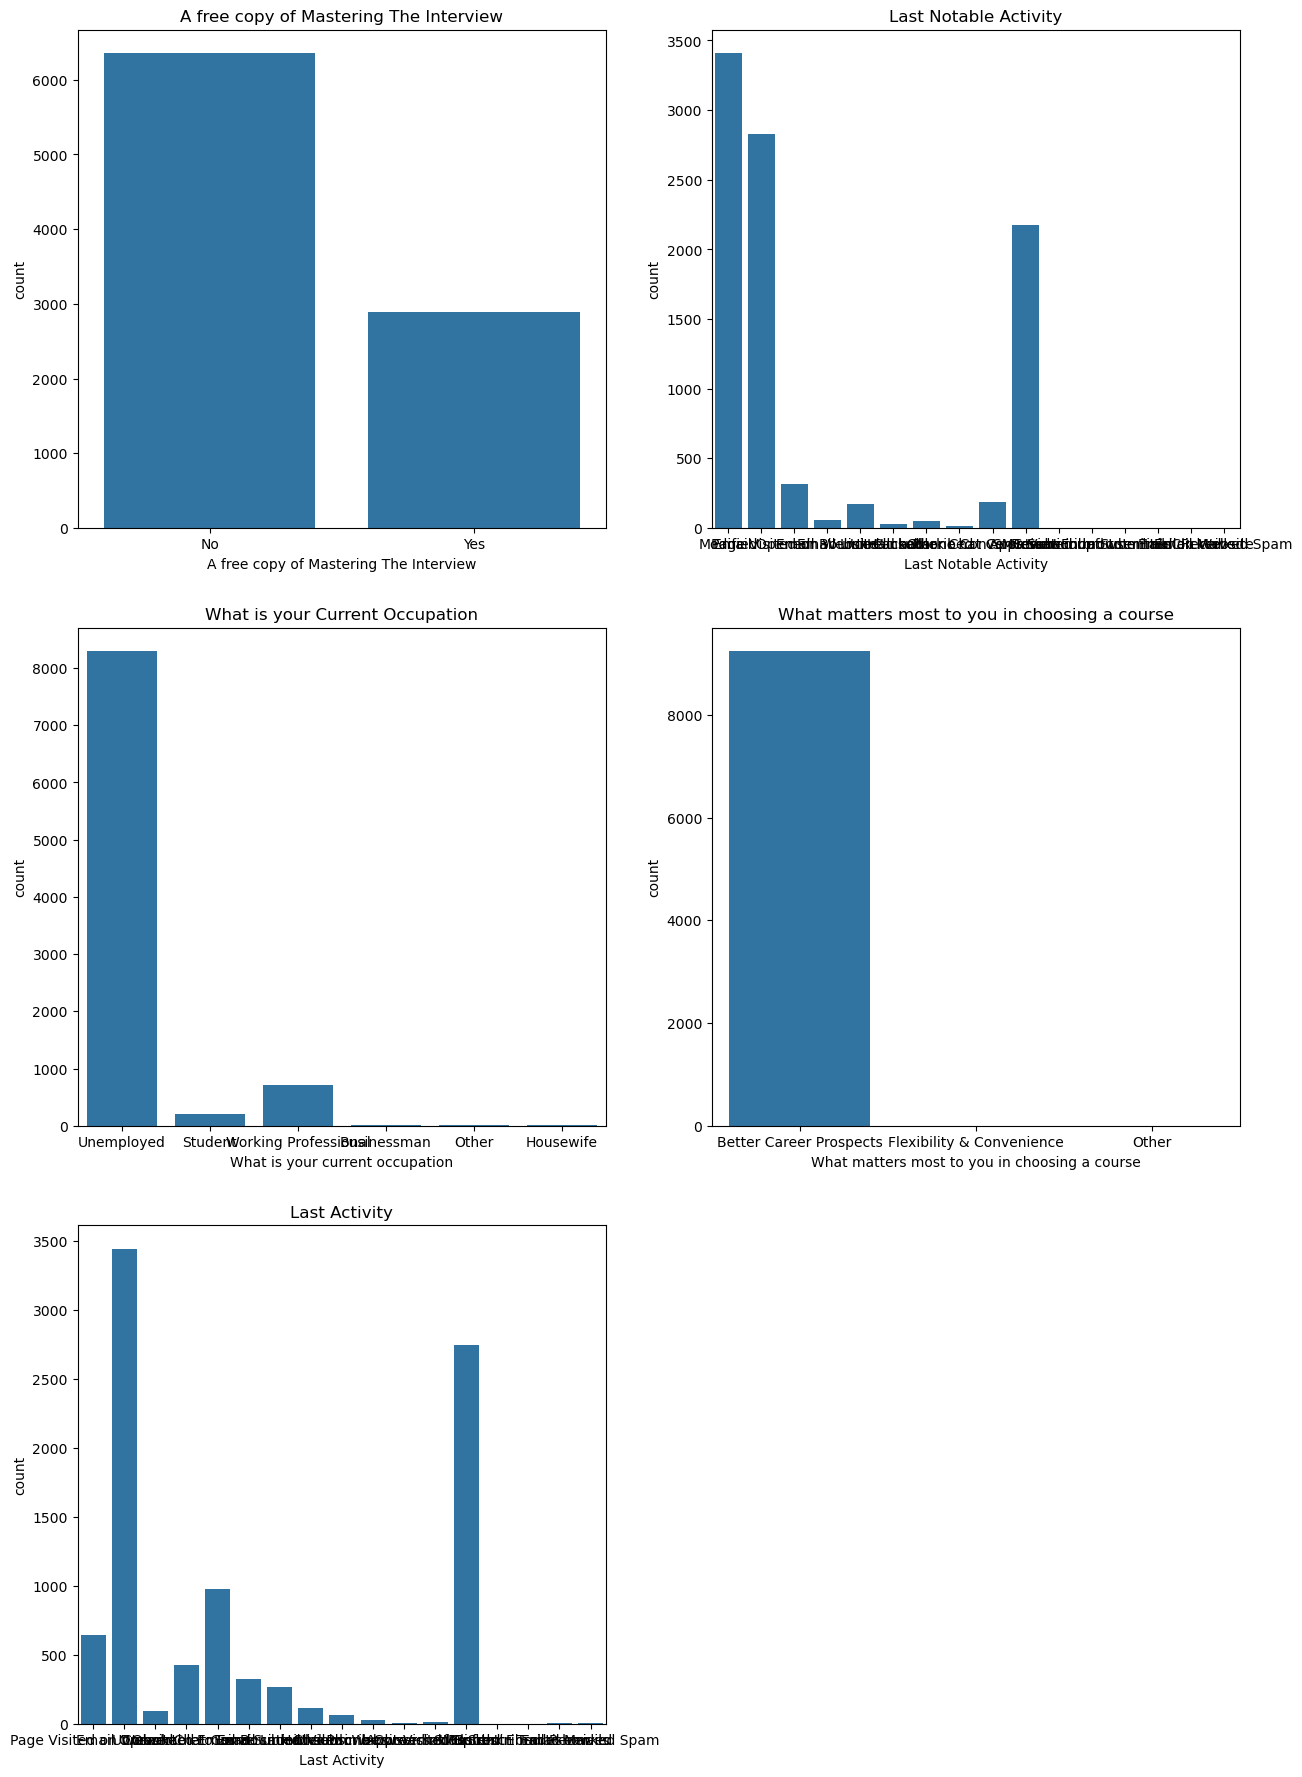

In [50]:
plt.figure(figsize = (15,22))
plt.subplot(3,2,1)
sns.countplot(x='A free copy of Mastering The Interview',data=leads_scoring_df)
plt.title('A free copy of Mastering The Interview')

plt.subplot(3,2,2)
sns.countplot(x='Last Notable Activity',data=leads_scoring_df)
plt.title('Last Notable Activity')


plt.subplot(3,2,3)
sns.countplot(x='What is your current occupation',data=leads_scoring_df)
plt.title('What is your Current Occupation')
plt.subplot(3,2,4)
sns.countplot(x='What matters most to you in choosing a course',data=leads_scoring_df)
plt.title('What matters most to you in choosing a course')
plt.subplot(3,2,5)
sns.countplot(x='Last Activity',data=leads_scoring_df)
plt.title('Last Activity')
plt.show()

In [ ]:
## insights:


##### Numerical Variables

In [34]:
# finding numercal varibles from info() using datatype=int
leads_scoring_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

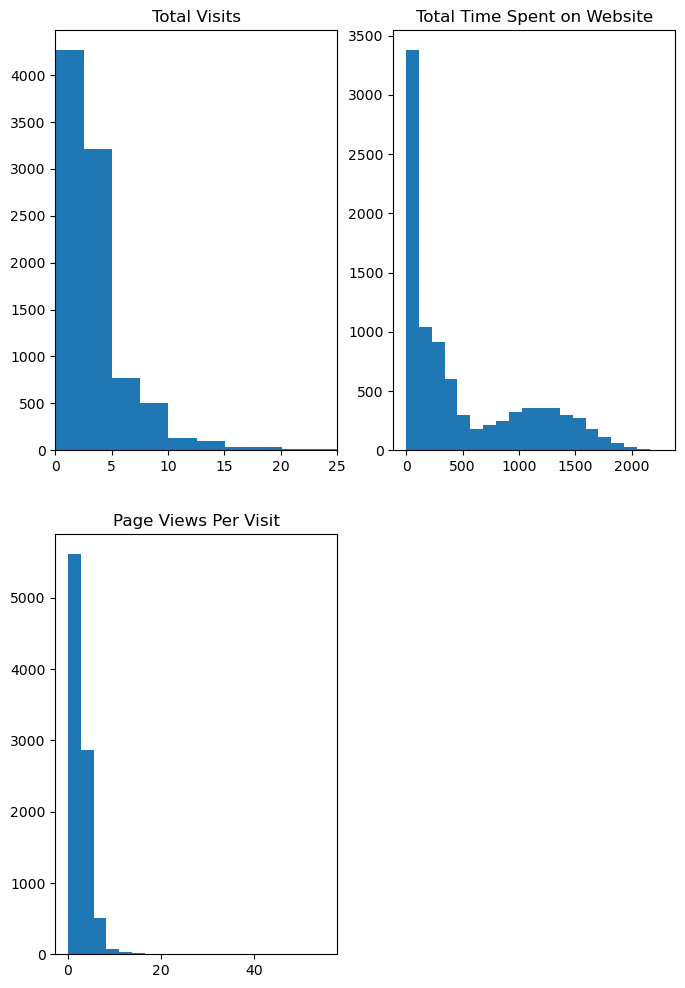

In [51]:
# visualising numerical varibles using histogram plot

plt.figure(figsize = (8,12))
plt.subplot(2,2,1)
plt.hist(leads_scoring_df['TotalVisits'], bins = 100)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(2,2,2)
plt.hist(leads_scoring_df['Total Time Spent on Website'], bins = 20)
plt.title('Total Time Spent on Website')

plt.subplot(2,2,3)
plt.hist(leads_scoring_df['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')


plt.show()


#### Target variable

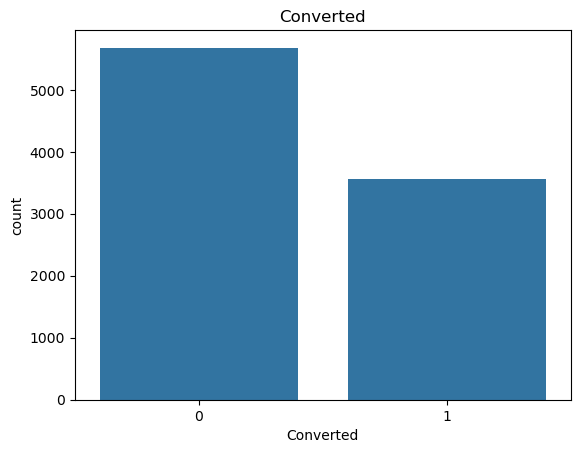

In [48]:
# converted column: which is the target variable(The target variable. Indicates whether a lead has been successfully converted or not)
# visualising converted column using countplot
sns.countplot(x='Converted',data=leads_scoring_df)
plt.title('Converted')
plt.show()


In [ ]:
# Insight:Around 5600 people  haven't join any course whereas more than 3000 people have got converted to leads by joining any course from X education.

#### Bivariate Analysis

##### Categorical_Target Variable Analysis

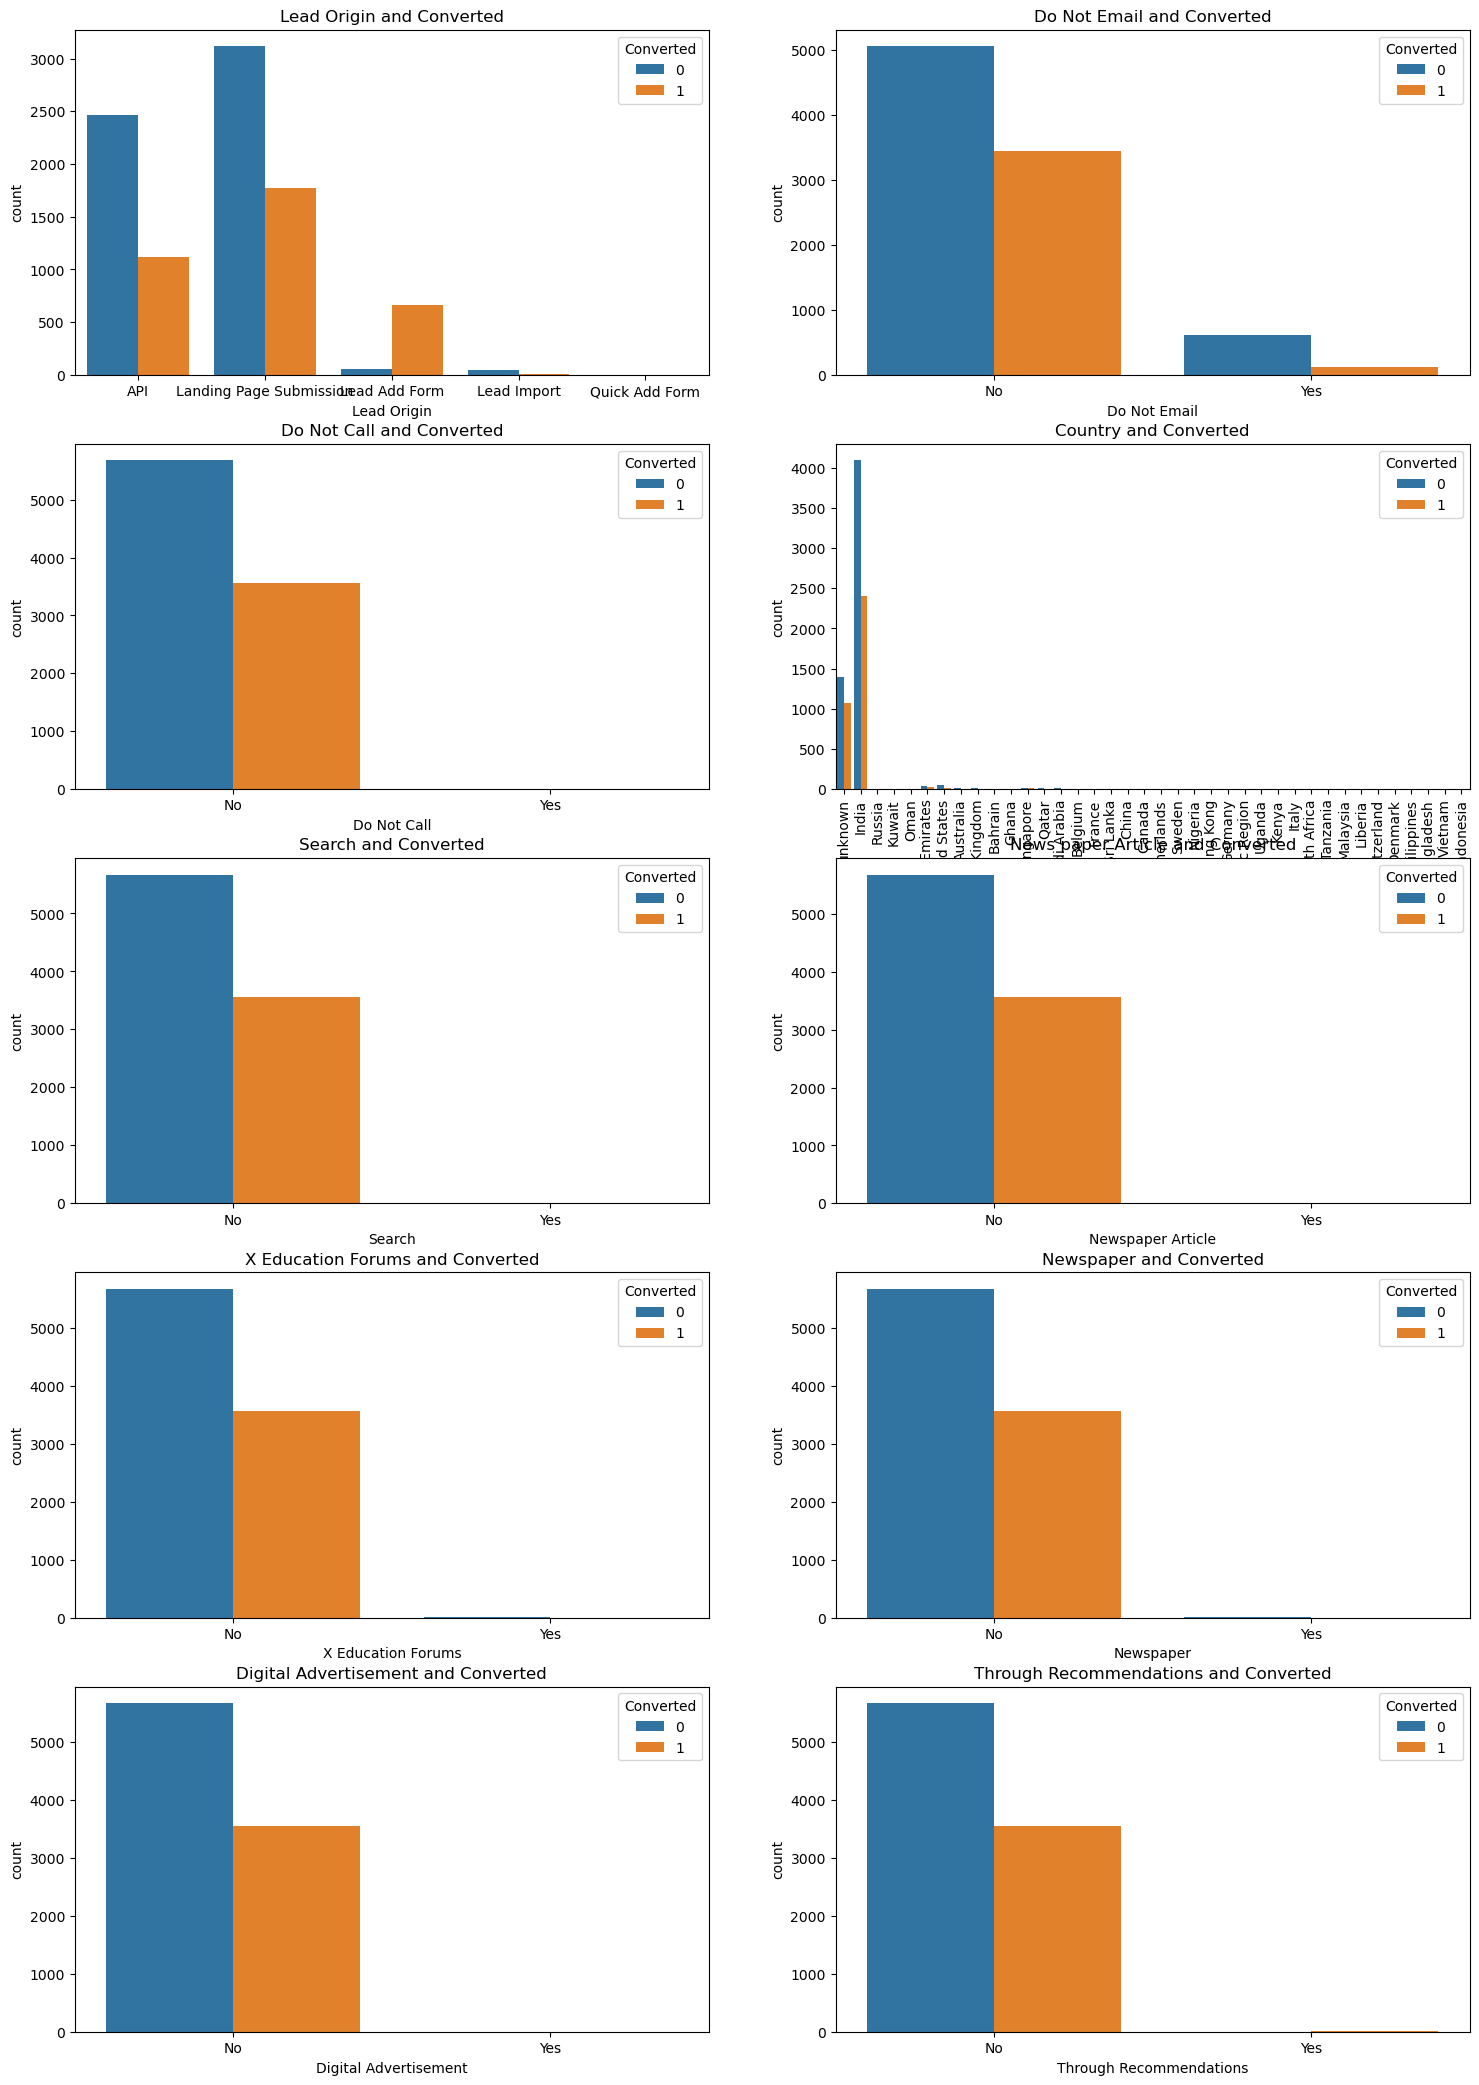

In [60]:
# visualising the relationship between categorical variables and target variable " converted" using count plot
plt.figure(figsize = (18,26))

plt.subplot(5,2,1)
sns.countplot(x='Lead Origin', hue= 'Converted',data=leads_scoring_df)
plt.title('Lead Origin and Converted')

plt.subplot(5,2,2)
sns.countplot(x='Do Not Email',hue= 'Converted',data=leads_scoring_df)
plt.title('Do Not Email and Converted')

plt.subplot(5,2,3)
sns.countplot(x='Do Not Call',hue= 'Converted',data=leads_scoring_df)
plt.title('Do Not Call and Converted')

plt.subplot(5,2,4)
sns.countplot(x='Country',hue= 'Converted',data=leads_scoring_df).tick_params(axis='x', rotation = 90)
plt.title('Country and Converted')

plt.subplot(5,2,5)
sns.countplot(x='Search',hue= 'Converted',data=leads_scoring_df)
plt.title('Search and Converted')

plt.subplot(5,2,6)
sns.countplot(x='Newspaper Article',hue= 'Converted',data=leads_scoring_df)
plt.title('News paper Article and Converted')

plt.subplot(5,2,7)
sns.countplot(x='X Education Forums',hue= 'Converted',data=leads_scoring_df)
plt.title('X Education Forums and Converted')

plt.subplot(5,2,8)
sns.countplot(x='Newspaper',hue= 'Converted',data=leads_scoring_df)
plt.title('Newspaper and Converted')

plt.subplot(5,2,9)
sns.countplot(x='Digital Advertisement',hue= 'Converted',data=leads_scoring_df)
plt.title('Digital Advertisement and Converted')

plt.subplot(5,2,10)
sns.countplot(x='Through Recommendations',hue= 'Converted',data=leads_scoring_df)
plt.title('Through Recommendations and Converted')

plt.show()

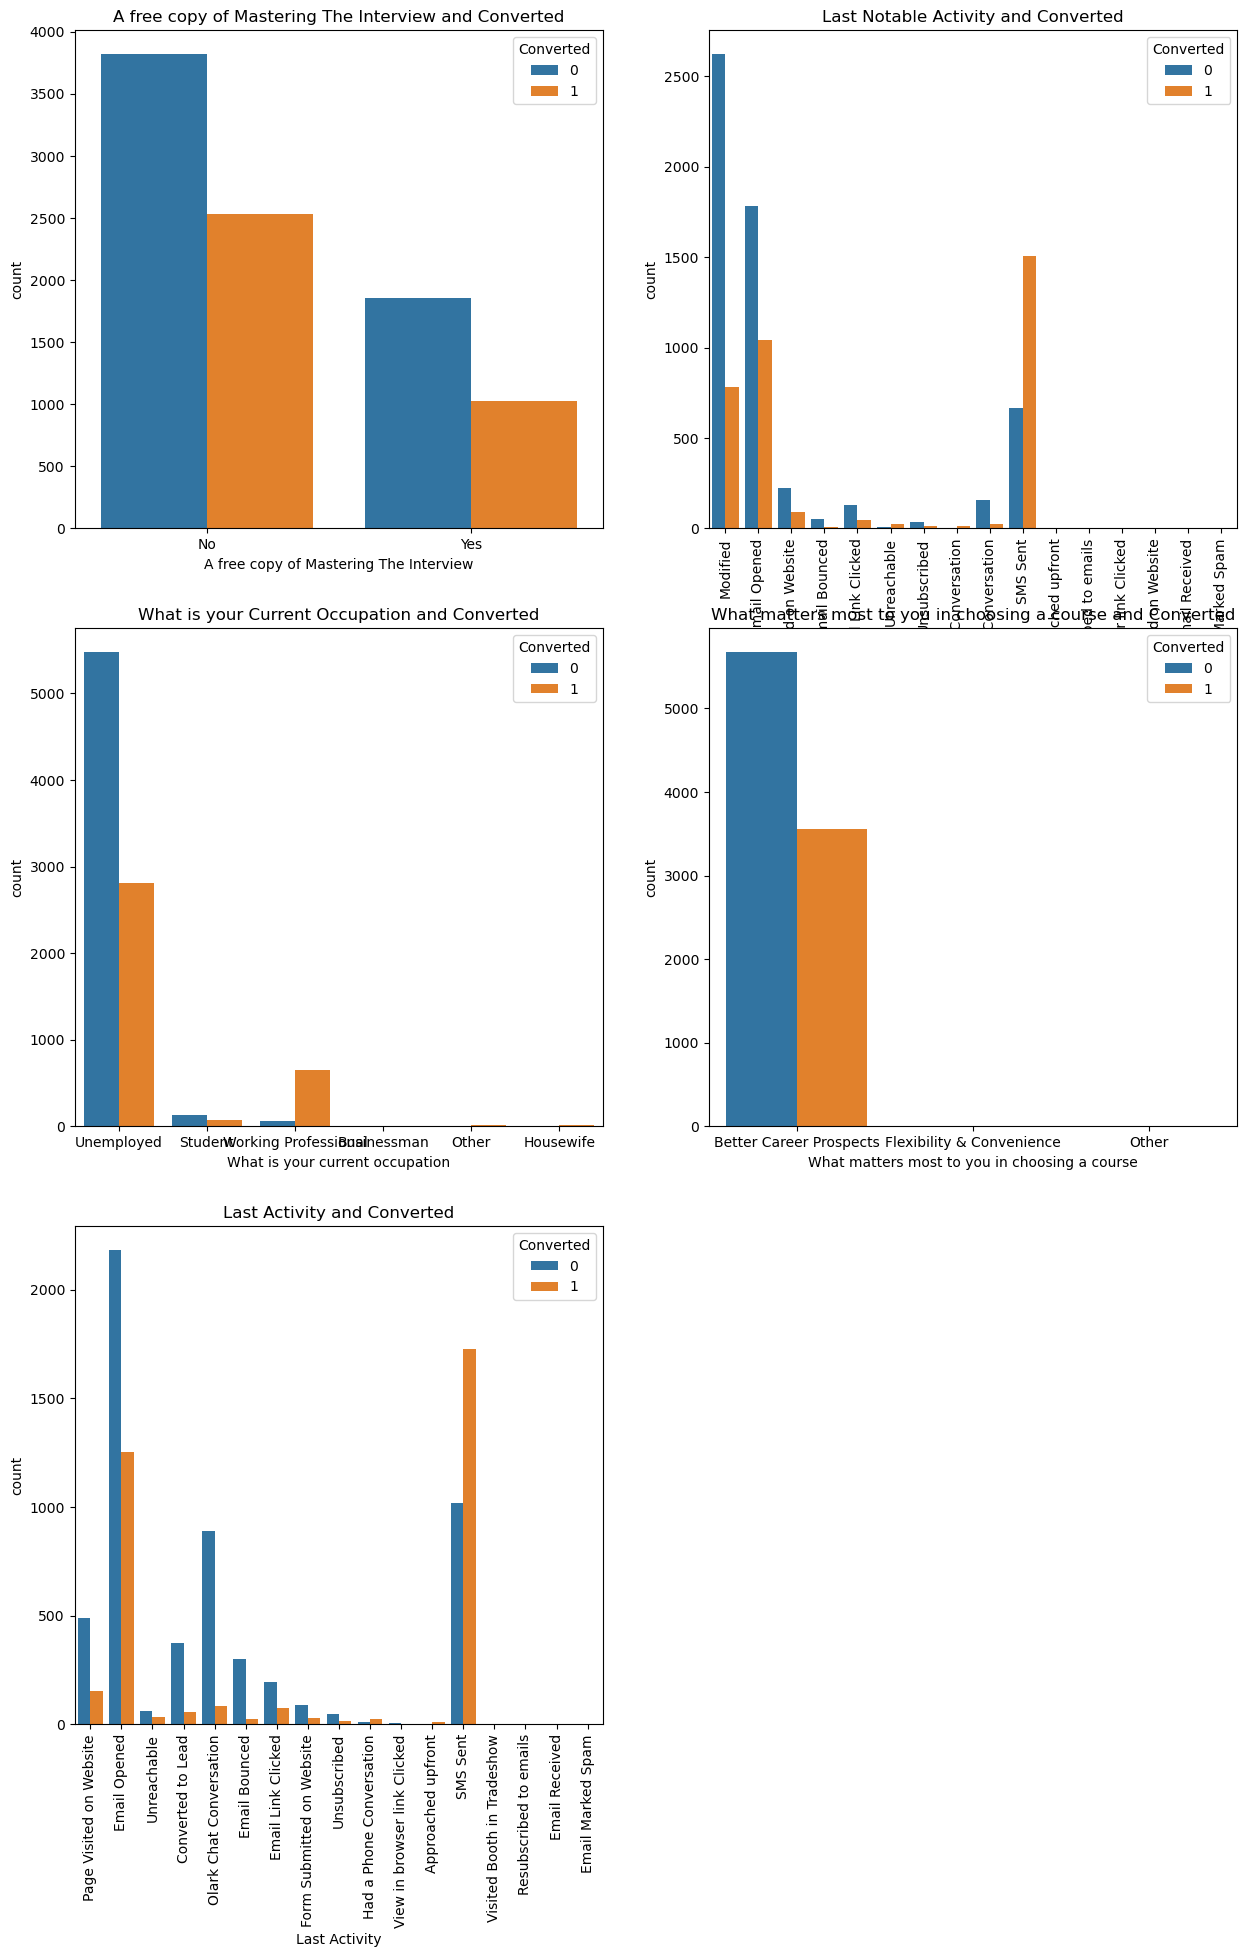

In [61]:
plt.figure(figsize = (15,22))
plt.subplot(3,2,1)
sns.countplot(x='A free copy of Mastering The Interview',hue='Converted',data=leads_scoring_df)
plt.title('A free copy of Mastering The Interview and Converted')

plt.subplot(3,2,2)
sns.countplot(x='Last Notable Activity',hue='Converted',data=leads_scoring_df).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity and Converted')


plt.subplot(3,2,3)
sns.countplot(x='What is your current occupation',hue='Converted',data=leads_scoring_df)
plt.title('What is your Current Occupation and Converted')
plt.subplot(3,2,4)

sns.countplot(x='What matters most to you in choosing a course',hue='Converted',data=leads_scoring_df)
plt.title('What matters most to you in choosing a course and Converted')
plt.subplot(3,2,5)

sns.countplot(x='Last Activity',hue='Converted',data=leads_scoring_df).tick_params(axis='x', rotation = 90)
plt.title('Last Activity and Converted')
plt.show()

In [ ]:
# Insights:
